In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('F:/portneuf/analysis/utils/'))

In [2]:
df = pd.read_csv('NLCD_3P_percent.csv')
df_c = pd.read_csv('NLCD_3P_pixel_count.csv')

In [3]:
df

,Year,UID,Shrub/Scrub,Open_Water,Emergent_Herbaceous_Wetlands,Barren_Land,Grassland/Herbaceous,"Developed,_High_Intensity",Woody_Wetlands,Evergreen_Forest,Cultivated_Crops,Pasture/Hay,"Developed,_Medium_Intensity",Deciduous_Forest,"Developed,_Low_Intensity","Developed,_Open_Space"
0,2023,101,54.600767,0.321847,0.644030,0.001689,0.988153,0.002595,0.595375,19.030954,16.165236,2.024381,0.048024,3.462525,0.825470,1.288953
1,2023,102,61.087679,0.068100,1.380357,0.004023,1.442699,0.009703,0.275272,13.436920,13.713163,2.211448,0.243682,2.761037,1.541700,1.824216
2,2023,103,43.256663,4.090327,2.008834,0.037796,9.176767,0.515500,4.677015,7.143621,18.726060,0.673365,1.932369,1.567864,4.449122,1.744698
3,2010,101,58.571925,0.312313,0.653926,0.007422,0.509646,0.001991,0.593564,17.551747,14.873793,1.903648,0.045214,3.080837,0.810859,1.083114
4,2010,102,62.210988,0.055438,1.320185,0.004023,2.885640,0.008579,0.274449,12.433493,13.099667,2.128083,0.231322,2.282136,1.510103,1.555894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2005,102,61.788750,0.061000,1.298057,0.004023,3.331906,0.006922,0.282850,12.039872,13.690024,2.162873,0.206413,2.159858,1.403773,1.563678
71,2005,103,43.660279,3.846548,1.873672,0.110315,8.391881,0.491866,4.878305,6.601979,21.157673,0.672135,1.640599,1.194379,3.934626,1.545742
72,2008,101,59.492553,0.252578,0.653503,0.022205,0.564717,0.001991,0.594168,17.253290,14.280148,1.926456,0.041012,3.056947,0.761934,1.098497
73,2008,102,62.439003,0.058278,1.294212,0.004023,3.249638,0.008283,0.276579,12.213934,12.875432,2.129267,0.219193,2.211107,1.455041,1.566011


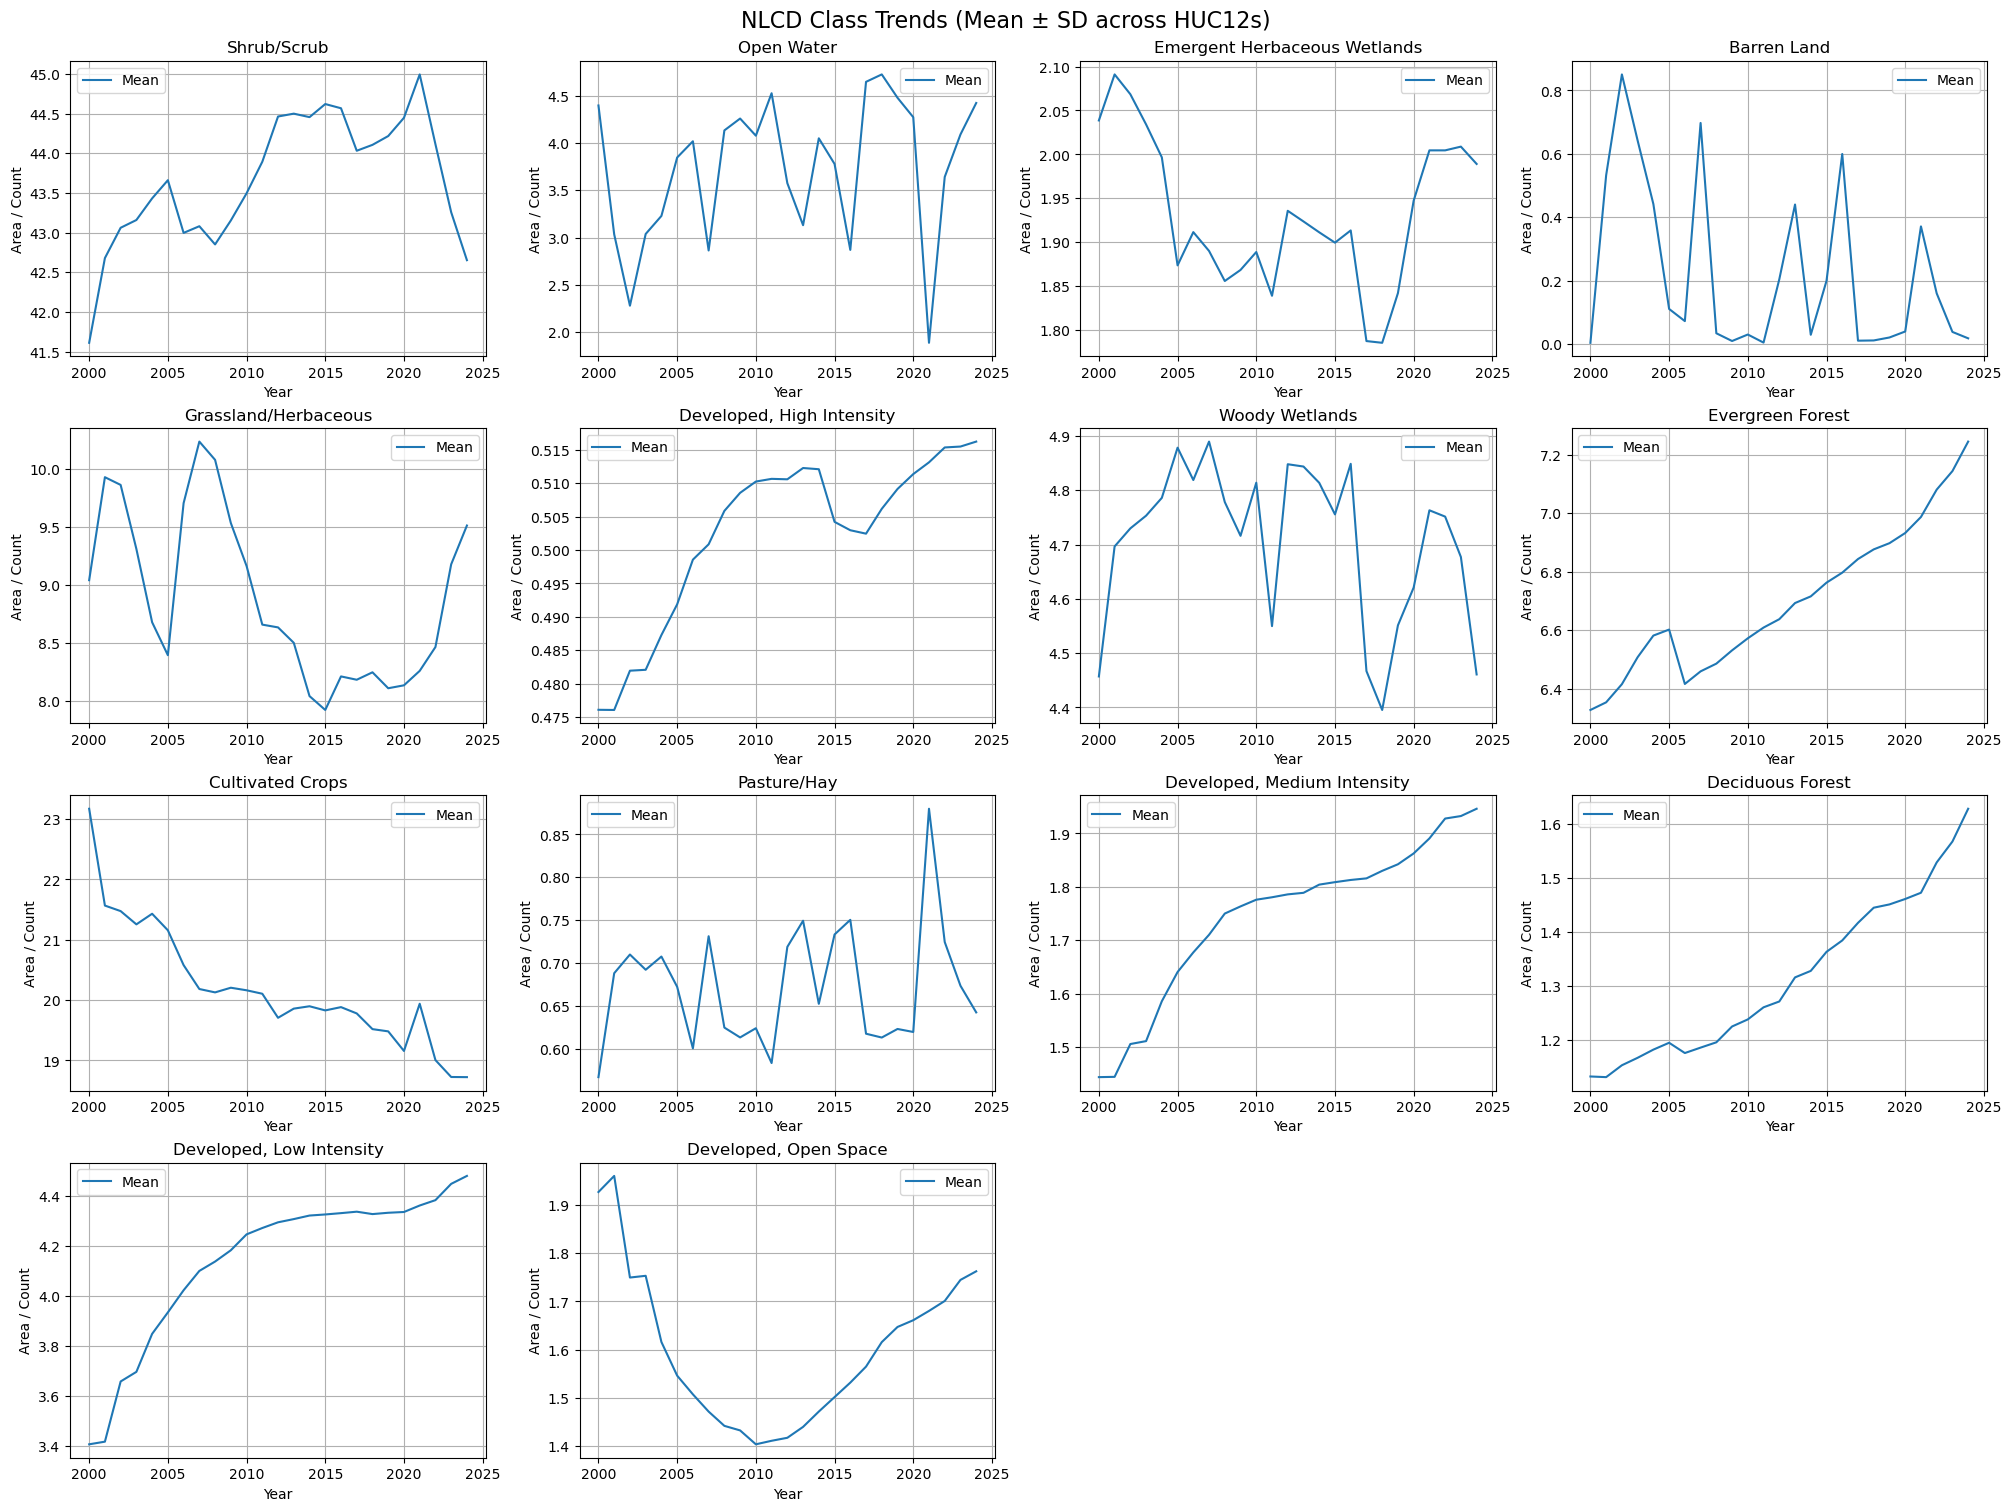

In [22]:
nlcd_columns = ['Shrub/Scrub', 'Open_Water', 'Emergent_Herbaceous_Wetlands', 'Barren_Land',
                'Grassland/Herbaceous', 'Developed,_High_Intensity', 'Woody_Wetlands',
                'Evergreen_Forest', 'Cultivated_Crops', 'Pasture/Hay',
                'Developed,_Medium_Intensity', 'Deciduous_Forest',
                'Developed,_Low_Intensity', 'Developed,_Open_Space']

# Group by Year and calculate mean and std for each NLCD class
grouped = df[df['UID'] == 103].sort_values(by='Year')

# Set up subplots
ncols = 4
nrows = int(len(nlcd_columns) / ncols) + (len(nlcd_columns) % ncols > 0)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Plot each NLCD class
for i, col in enumerate(nlcd_columns):
    ax = axes[i]

    ax.plot(grouped['Year'], grouped[col], label='Mean')
    ax.set_title(col.replace('_', ' '))
    ax.set_xlabel('Year')
    ax.set_ylabel('Area / Count')
    ax.grid(True)
    ax.legend()

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('NLCD Class Trends (Mean ± SD across HUC12s)', fontsize=16)
plt.show()


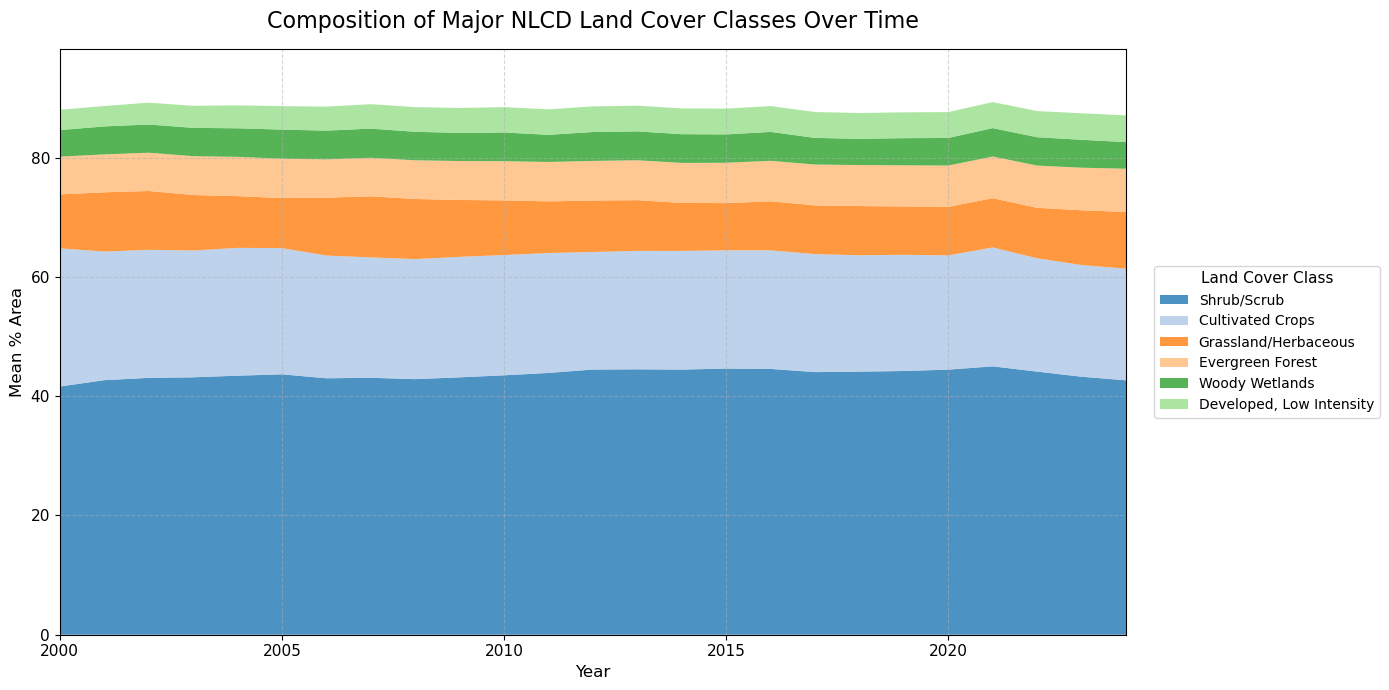

In [21]:
uid =103
df_temp = df[df['UID'] == uid].sort_values(by='Year').set_index('Year').drop(columns=['UID'])
# Filter top 6 major land classes by overall mean
major_classes = df_temp.mean().sort_values(ascending=False).head(6).index.tolist()
stack_data = df_temp[major_classes]

# Define color palette (optional, choose based on preference)
colors = plt.get_cmap('tab20').colors[:len(major_classes)]

# Create subplot figure manually
fig, ax = plt.subplots(figsize=(14, 7))

# Plot stacked area
ax.stackplot(stack_data.index, stack_data.T, labels=[c.replace('_', ' ') for c in major_classes], colors=colors, alpha=0.8)

# Enhancements
ax.set_title('Composition of Major NLCD Land Cover Classes Over Time', fontsize=16,  pad=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mean % Area', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(stack_data.index.min(), stack_data.index.max())
ax.set_ylim(0, stack_data.sum(axis=1).max() * 1.1)

# Add legend outside the plot
ax.legend(title='Land Cover Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, title_fontsize=11)

# Ticks
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
#plt.savefig('graphics/major_classes_trend.png', bbox_inches='tight')
plt.show()


In [15]:
stack_data

,Shrub/Scrub,Evergreen_Forest,Cultivated_Crops,Deciduous_Forest
Year,,,,
2000,59.886012,16.508479,14.711025,3.027920
2001,60.005880,16.496272,14.622629,3.025928
2002,60.027177,16.625444,14.531695,3.036367
2003,59.906049,16.744581,14.554020,3.043668
2004,59.775295,16.797222,14.659299,3.046021
2005,59.572102,16.953233,14.584237,3.055436
2006,59.562853,17.048679,14.358533,3.057489
2007,59.515493,17.166364,14.313272,3.056102
2008,59.492553,17.253290,14.280148,3.056947
